## This code is to find out the different of each epoch and batch size combination

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [3]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path = parent_path / 'Data/googlenet/cifar100/'
print('The data path is:', data_path)

The current path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/code
The parent path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/cifar100


### extract data

In [4]:
batch_sizes = [64]
epochs = [10]
rounds = 1

#### read all the data from all the folders

In [5]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder_names = os.listdir(data_path)
print('The folder names are:', folder_names)
print('The folder list is:', folder_list)

# find the common folders
common_folders = list(set(folder_list).intersection(folder_names))
# sort the common folders
common_folders.sort()
print('The common folders are:', common_folders)
print(len(common_folders))

The folder names are: ['E10_B64_R0']
The folder list is: ['E10_B64_R0']
The common folders are: ['E10_B64_R0']
1


### analysis data

#### find the data in same epoch and batch size

In [6]:
# read the data from the common folders
datafolder = data_path / common_folders[0]
print('The data folder is:', datafolder)
# find the files in the data folder
files = os.listdir(datafolder)
print('The files are:', files)


The data folder is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/cifar100/E10_B64_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']


In [7]:
# read all the files in the common folders
LayersTime = np.load(datafolder / 'Layers_time.npy', allow_pickle=True)
TrainPartTime = np.load(datafolder / 'Train_part_time.npy', allow_pickle=True)
EpochTime = np.load(datafolder / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy = np.load(datafolder / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc = np.load(datafolder / 'Train_acc.npy', allow_pickle=True)
TestAcc = np.load(datafolder / 'Test_acc.npy', allow_pickle=True)

In [8]:
# print('The layers time is:', LayersTime)
# print('The train part time is:', TrainPartTime)
# print('The epoch time is:', EpochTime)
# print('The epoch energy is:', EpochEnergy)
# print('The train accuracy is:', TrainAcc)
# print('The test accuracy is:', TestAcc)

#### LayersTime

In [9]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


In [10]:
# print('The shape of LayersTime is:', LayersTime.shape)
# print(LayersTime)

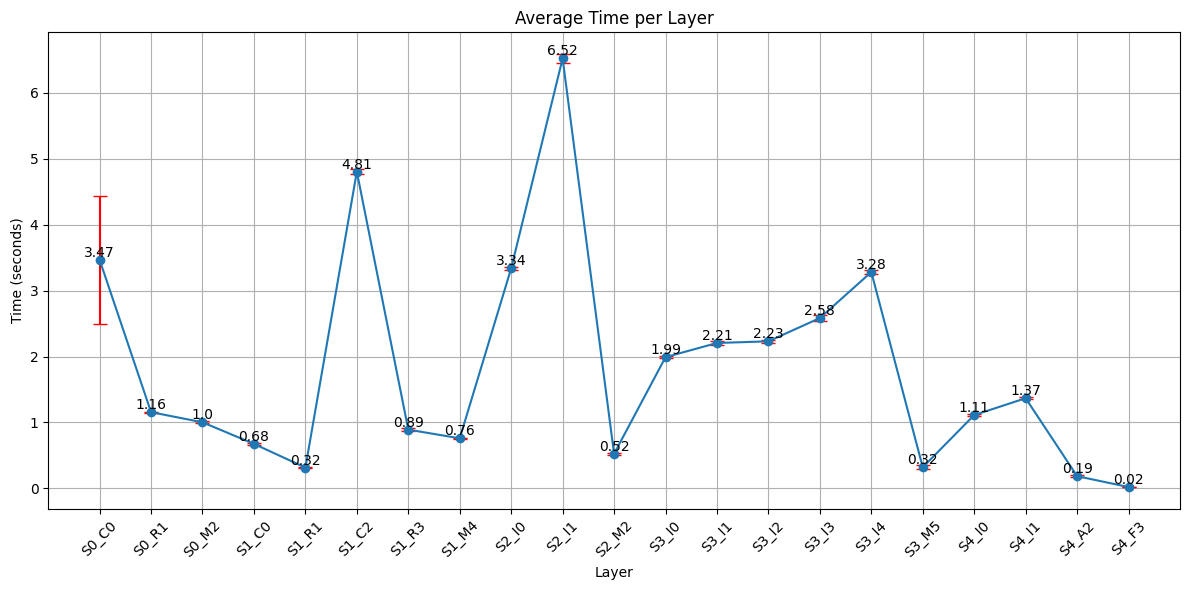

In [20]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime, axis=1)
layer_stds = np.std(LayersTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()


In [12]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [13]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[3.34389925 3.32960105 3.34454012 3.35547209 3.35579062 3.35725045
  3.35691667 3.35524058 3.32884359 3.26822829]
 [6.38590765 6.4750247  6.5034349  6.51315403 6.52270603 6.52407289
  6.52262068 6.53564501 6.57577085 6.67172289]
 [1.96032    1.97699165 1.98958373 1.98894691 2.00513411 1.98882866
  1.98754573 2.01147723 1.97922516 2.02317047]
 [2.15128493 2.18184137 2.19955015 2.21167302 2.2057035  2.21514916
  2.21708131 2.20376301 2.24964666 2.22661281]
 [2.19971728 2.20487309 2.2376771  2.24657559 2.25312138 2.25478101
  2.2497685  2.26300812 2.23019528 2.17444205]
 [2.49923968 2.55142474 2.56142354 2.58026338 2.58385015 2.58149934
  2.58490205 2.58536077 2.62478662 2.69224048]
 [3.23726988 3.25983739 3.29018807 3.29956651 3.30315304 3.30582881
  3.30105615 3.31287885 3.27724624 3.23812246]
 [1.09477997 1.10071445 1.1148653  1.1181736  1.11990428 1.11816907
  1.12317657 1.11677861 1.11684918 1.10194111]
 [1.3551023  1.36916757 1.37385464 1.37974262 1.37602878 1

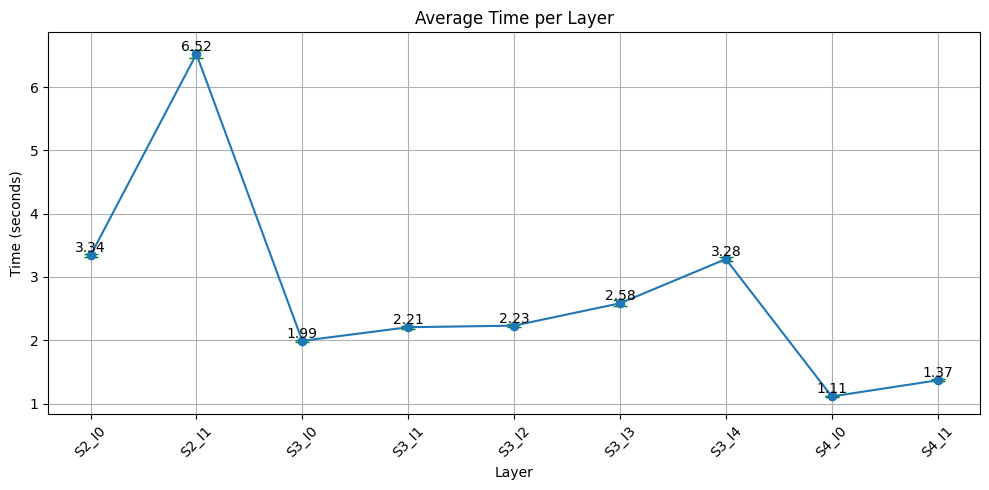

In [22]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [15]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

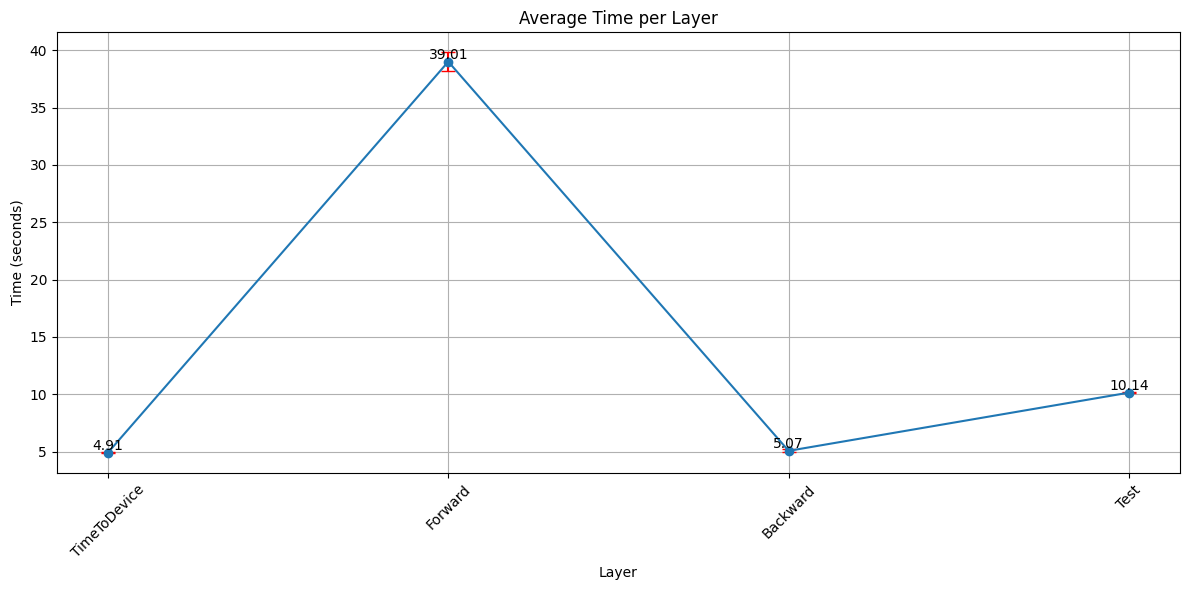

In [23]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime, axis=1)
trainpart_stds = np.std(TrainPartTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()